___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [575]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from scipy.stats import skew

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [576]:
#to read the data, I used pd.read_csv() from pandas library
path = 'Ready_to_ML.csv'
df = pd.read_csv(path)

In [577]:
#To read the head of the data
df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,Yes,120200.000,Manual,Diesel,Dealer,1595.000,5.000,98.000,Front,Alloy wheels,1270.000,No,Cloth,2.000,efficient,6.000,75.000,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,Yes,5000.000,Automatic,Electric,Dealer,1.000,1.000,0.000,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.000,No,Part/Full Leather,1.000,efficient,0.000,215.000,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,Yes,18900.000,Automatic,Benzine,Dealer,1991.000,8.000,162.000,4WD,Alloy wheels,1555.000,No,Part/Full Leather,2.000,unefficient,2.000,310.000,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,Yes,18995.000,Automatic,Benzine,Dealer,1991.000,7.000,169.000,4WD,Sport seats,1455.000,No,Part/Full Leather,2.000,unefficient,2.000,225.000,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,Yes,197000.000,Automatic,Diesel,Dealer,2143.000,7.000,162.000,4WD,Alloy wheels,1545.000,No,Part/Full Leather,2.000,unefficient,7.000,100.000,4.900,Standard,Standard,Safety Premium Plus Package


In [578]:
#I used this option to see all the columns of the data and see all the features in it
pd.set_option('display.max_columns', None)

In [579]:
df

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,Yes,120200.000,Manual,Diesel,Dealer,1595.000,5.000,98.000,Front,Alloy wheels,1270.000,No,Cloth,2.000,efficient,6.000,75.000,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,Yes,5000.000,Automatic,Electric,Dealer,1.000,1.000,0.000,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.000,No,Part/Full Leather,1.000,efficient,0.000,215.000,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,Yes,18900.000,Automatic,Benzine,Dealer,1991.000,8.000,162.000,4WD,Alloy wheels,1555.000,No,Part/Full Leather,2.000,unefficient,2.000,310.000,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,Yes,18995.000,Automatic,Benzine,Dealer,1991.000,7.000,169.000,4WD,Sport seats,1455.000,No,Part/Full Leather,2.000,unefficient,2.000,225.000,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,Yes,197000.000,Automatic,Diesel,Dealer,2143.000,7.000,162.000,4WD,Alloy wheels,1545.000,No,Part/Full Leather,2.000,unefficient,7.000,100.000,4.900,Standard,Standard,Safety Premium Plus Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26706,Volvo S90,Volvo,"HERMANOS LUMIERE Nº16, 29004 MALAGA, ES",37600.000,Sedan,Used,Yes,40345.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,4WD,Alloy wheels,2077.000,No,Part/Full Leather,2.000,efficient,3.000,288.000,2.000,Standard,Standard,Safety Premium Plus Package
26707,Volvo S40,Volvo,"Stobbeweg 6, 2461 EX TER AAR, NL",5499.000,Sedan,Used,No,145000.000,Automatic,Benzine,Dealer,2435.000,5.000,217.000,Front,"Alloy wheels (16""), Trailer hitch",1357.000,Yes,Cloth,3.000,efficient,18.000,125.000,9.100,Standard,Standard,Safety Standard Package
26708,Volvo C30,Volvo,"Sur rendez-vous, 5060 Sambreville, BE",7300.000,Sedan,Used,Yes,96000.000,Manual,Diesel,Dealer,1560.000,6.000,99.000,Front,"Alloy wheels, Automatically dimming interior m...",1356.000,Yes,Cloth,1.000,unefficient,11.000,84.000,3.800,Standard,Standard,Safety Premium Package
26709,Volvo S90,Volvo,"Bergambachterstraat 5, 2871 JB SCHOONHOVEN, NL",29900.000,Sedan,Used,Yes,94343.000,Automatic,Benzine,Dealer,1969.000,8.000,149.000,4WD,"Alloy wheels (18""), Automatically dimming inte...",1617.000,Yes,Part/Full Leather,1.000,efficient,5.000,187.000,6.500,Standard,Standard,Safety Premium Package


In [580]:
#To see if there is null data and more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [581]:
df.describe()

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
count,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000
mean,23537.241,68863.812,1708.965,5.820,129.526,1425.205,1.460,5.166,118.414,5.532
std,20811.986,62794.146,772.440,1.417,54.255,307.387,0.853,4.655,65.642,2.220
min,490.000,0.000,0.000,1.000,0.000,347.000,1.000,0.000,33.000,0.000
25%,12490.000,19155.000,1248.000,5.000,105.000,1228.000,1.000,2.000,80.000,4.300
50%,18440.000,54000.000,1595.000,6.000,123.000,1375.000,1.000,4.000,100.000,5.200
75%,28330.000,100675.000,1969.000,6.000,150.000,1597.000,2.000,7.000,135.000,6.400
max,549000.000,667128.000,6300.000,8.000,399.000,3150.000,9.000,20.000,450.000,18.300


In [582]:
#To find out if there is a duplicated values or not
df.duplicated().sum()
#As we can see that there are aroud 1815 duplicated value, so in the next step, I will get rid of them

1815

In [583]:
#To be able to remove the duplicated data from our data, i have to put inplace = True, to change it, otherwise, it will not change it.
df.drop_duplicates(inplace=True)

In [584]:
#Now, let's check again for the duplicated data
df.duplicated().sum()
#As we can see now, the value is 0, so, we removed successfuly

0

In [585]:
df.make_model.value_counts()
#As we can see, there are some models, are just one and this may affect the model, because the model cannot learn from it
#So, if we get rid of them, it will be better.

Renault Megane              825
SEAT Leon                   757
Dacia Sandero               721
Hyundai i30                 699
Opel Astra                  634
Ford Mustang                572
Peugeot 308                 536
Nissan Qashqai              484
Ford Focus                  483
SEAT Ibiza                  433
Volvo V40                   430
Fiat Tipo                   415
Fiat 500                    413
Renault Clio                404
Ford Fiesta                 392
Nissan Micra                380
Fiat 500X                   373
Skoda Octavia               359
Opel Corsa                  358
Dacia Duster                343
Toyota Yaris                323
Opel Insignia               290
Volvo C70                   281
Peugeot 208                 260
Skoda Fabia                 246
Fiat 500C                   238
Toyota Auris                231
Peugeot RCZ                 220
Hyundai TUCSON              216
Peugeot 3008                215
Ford Kuga                   208
Dacia Lo

In [586]:
df.make.value_counts()
#After seeing this column, i can say that it is just like make_model column, as it containes the same details.
#In this case, i may drop it from the data, and keep make_model instead.

Mercedes-Benz    2258
Peugeot          2248
Renault          2205
Ford             2135
Opel             2089
Fiat             1967
Volvo            1905
Nissan           1890
Hyundai          1818
Toyota           1722
SEAT             1686
Skoda            1519
Dacia            1454
Name: make, dtype: int64

In [587]:
df.location.value_counts()
#I don't this so, the location will change the price, so, i may drop it.

Av. Laboral, 10,  28021 MADRID, ES                                    279
Ctra. del Mig, 96,,  08097 L'Hospitalet de Llobregat, ES              142
9 boulevard Jules Ferry,  75011 Paris, FR                             136
Bestel gemakkelijk Online 24/7,  1000 Brussel, BE                     124
CARRETERA DE MATARO 10,  8903 SANT ADRIÀ DE BESÒS, ES                 104
                                                                     ... 
4581 Rosenau am Hengstpass, AT                                          1
Enkel op afspraak / Uniquement sur rendez-vous,  8500 Kortrijk, BE      1
SP31, 18,  15122 Alessandria - AL, IT                                   1
Via Francesco Rodio , 1,  72017 Ostuni  - Brindisi, IT                  1
Sur rendez-vous,  5060 Sambreville, BE                                  1
Name: location, Length: 7178, dtype: int64

In [588]:
df.fuel_type.value_counts()

Benzine               16038
Diesel                 8081
Electric                425
Liquid/Natural Gas      352
Name: fuel_type, dtype: int64

In [589]:
df.co_emissions.value_counts()

0.000      1228
115.000     658
99.000      570
124.000     567
119.000     513
117.000     498
129.000     478
108.000     440
109.000     436
139.000     427
114.000     391
113.000     378
110.000     369
104.000     354
123.000     351
89.000      348
116.000     348
130.000     341
120.000     325
112.000     285
125.000     279
149.000     275
105.000     269
138.000     264
127.000     262
107.000     252
93.000      244
111.000     237
126.000     221
98.000      221
145.000     220
128.000     211
121.000     208
118.000     207
96.000      206
137.000     202
95.000      202
273.000     194
133.000     193
155.000     191
85.000      191
122.000     186
135.000     184
178.000     182
106.000     180
148.000     177
102.000     172
142.000     166
134.000     164
276.000     164
159.000     163
103.000     158
147.000     158
131.000     157
154.000     156
88.000      153
166.000     150
132.000     148
136.000     148
140.000     145
144.000     144
169.000     144
156.000 

In [590]:
df.type.value_counts()

Used              21819
Demonstration      1314
Pre-registered     1241
Employee's car      522
Name: type, dtype: int64

In [591]:
df.body_type.value_counts()

Off-Road/Pick-up    4899
Station wagon       4897
Compact             4896
Sedan               4872
Coupe               2846
Convertible         2486
Name: body_type, dtype: int64

In [592]:
df.seller.value_counts()
#I don't this a seller may change the price, put i will complete with it, and if i need to remove it later, i will do.

Dealer            23418
Private seller     1478
Name: seller, dtype: int64

In [593]:
df.warranty.value_counts()

No     12539
Yes    12357
Name: warranty, dtype: int64

In [594]:
df.engine_size.value_counts()
#After seeing the value of it, it seems weired to me to have a size one in an engine, so I tried to search about it.
#If it is a typo, so, i will drop it.
#After i searched, i found out that, they are writting it in two types, in cubic centimeters and in litters,
#so if it is one, it is in litters.

1598.000    2201
999.000     2009
1969.000    1138
1461.000    1131
998.000      926
1199.000     916
1998.000     773
1498.000     717
1968.000     615
1997.000     613
1332.000     513
1798.000     473
898.000      431
1984.000     425
1499.000     409
1242.000     404
1560.000     393
1197.000     380
1368.000     349
1991.000     343
1248.000     330
0.000        298
1995.000     294
1600.000     267
5038.000     251
2143.000     250
1364.000     229
1591.000     202
1500.000     200
1950.000     199
3982.000     198
1956.000     192
3498.000     177
1395.000     176
1987.000     157
1200.000     156
1149.000     155
3696.000     152
1198.000     151
1398.000     147
1490.000     144
1497.000     143
2000.000     143
2996.000     142
1796.000     139
1496.000     135
1582.000     127
2435.000     125
1618.000     125
1482.000     124
1999.000     124
2925.000     118
1595.000     115
875.000      112
1.000        110
2987.000     106
1580.000     102
2261.000     101
1333.000      

## Now, i will remove the things that i don't need from the data

In [595]:
#First, i will drop the columns that i do not need
df.drop(['seller', 'make', 'location'], axis=1, inplace=True)

In [596]:
#Checking if they are deletedb
df.head()

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,16950.000,Compact,Used,Yes,120200.000,Manual,Diesel,1595.000,5.000,98.000,Front,Alloy wheels,1270.000,No,Cloth,2.000,efficient,6.000,75.000,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,80900.000,Compact,Pre-registered,Yes,5000.000,Automatic,Electric,1.000,1.000,0.000,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.000,No,Part/Full Leather,1.000,efficient,0.000,215.000,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,69900.000,Compact,Used,Yes,18900.000,Automatic,Benzine,1991.000,8.000,162.000,4WD,Alloy wheels,1555.000,No,Part/Full Leather,2.000,unefficient,2.000,310.000,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,46990.000,Compact,Used,Yes,18995.000,Automatic,Benzine,1991.000,7.000,169.000,4WD,Sport seats,1455.000,No,Part/Full Leather,2.000,unefficient,2.000,225.000,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,16800.000,Compact,Used,Yes,197000.000,Automatic,Diesel,2143.000,7.000,162.000,4WD,Alloy wheels,1545.000,No,Part/Full Leather,2.000,unefficient,7.000,100.000,4.900,Standard,Standard,Safety Premium Plus Package


In [597]:
#Now, i will remove the values under 100 in make_model, as it may affect the model.
make_model_column = df.make_model.value_counts()[df.make_model.value_counts() < 100].index
make_model_column

Index(['Hyundai i10', 'Peugeot 307', 'Fiat 124 Spider', 'Renault Twingo',
       'Fiat 500L', 'Opel Crossland X', 'Renault ZOE', 'Renault Laguna',
       'Mercedes-Benz A 200', 'Skoda Kamiq',
       ...
       'Mercedes-Benz ML 300', 'Dacia Break', 'Toyota Tundra',
       'Mercedes-Benz E 50 AMG', 'Mercedes-Benz CLS 300',
       'Mercedes-Benz S 65 AMG', 'Mercedes-Benz CLK 320', 'Toyota GR86',
       'Toyota Tacoma', 'Renault R 11'],
      dtype='object', length=420)

In [598]:
for i in make_model_column:
    column_index = df[df['make_model'] == i].index
    df.drop(column_index, inplace=True)
    
df.reset_index(drop=True, inplace=True)

In [599]:
df.make_model.value_counts().tail(10)

Opel Adam        114
Fiat Panda       111
Nissan Pulsar    110
Volvo S90        110
Volvo XC90       109
Toyota RAV 4     107
Volvo XC40       105
Volvo V90        104
Hyundai IONIQ    103
Nissan Juke      101
Name: make_model, dtype: int64

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

In [600]:
#First, i will see that object data
object_values = df.select_dtypes('O')
object_values.columns

Index(['make_model', 'body_type', 'type', 'warranty', 'gearbox', 'fuel_type',
       'drivetrain', 'extras', 'full_service_history', 'upholstery',
       'energy_efficiency_class', 'comfort_&_convenience_Package',
       'entertainment_&_media_Package', 'safety_&_security_Package'],
      dtype='object')

### Converting the Extras feature from object to numeric

In [601]:
df['extras'].dtype

dtype('O')

In [602]:
df['extras'] = df.extras.apply(lambda x: len(x.split(',')))

In [603]:
df['extras'].dtype

dtype('int64')

In [604]:
df['extras']

0        5
1        6
2        1
3        1
4        1
        ..
18192    9
18193    1
18194    1
18195    3
18196    2
Name: extras, Length: 18197, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2560db38390>,
 'caps': [<matplotlib.lines.Line2D at 0x2560db39d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2560ea93050>],
 'medians': [<matplotlib.lines.Line2D at 0x2560db856d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2560db87e50>],
 'means': []}

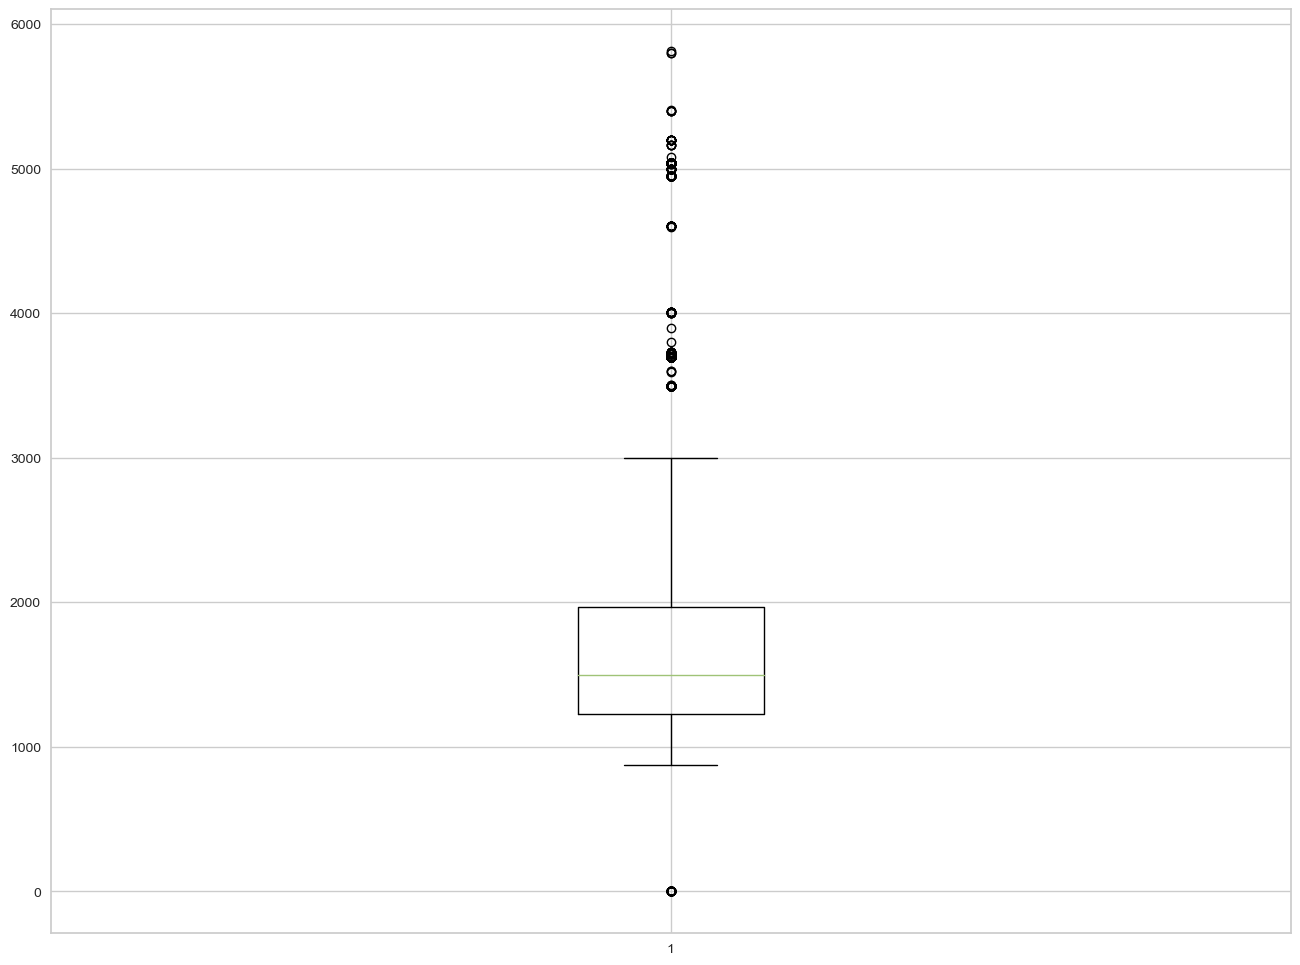

In [605]:
plt.figure(figsize=(16,12))
plt.boxplot(df['engine_size'])

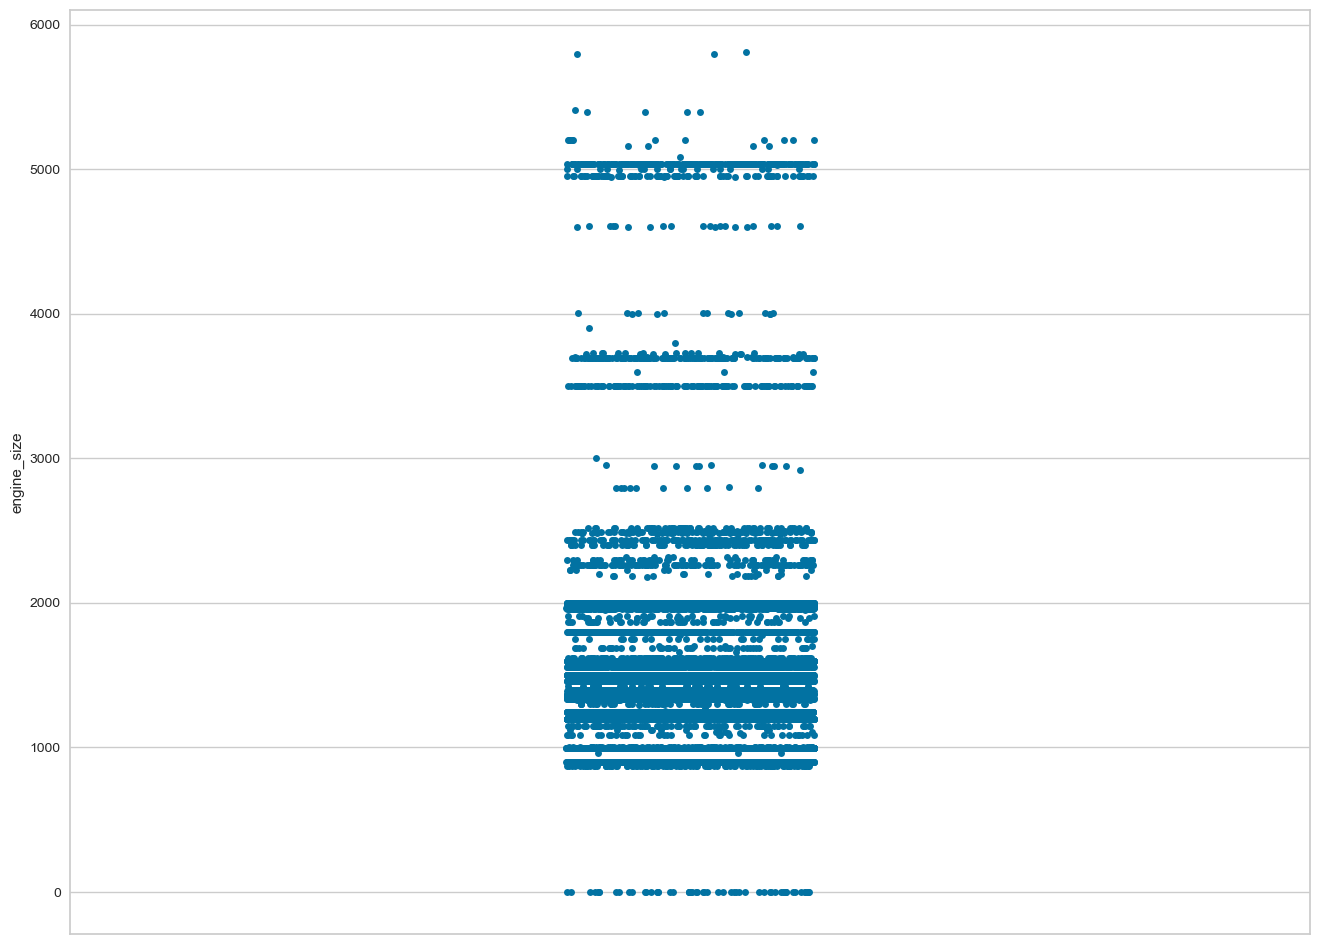

In [606]:
plt.figure(figsize=(16,12))
sns.stripplot(df.engine_size);

<Axes: xlabel='engine_size', ylabel='Count'>

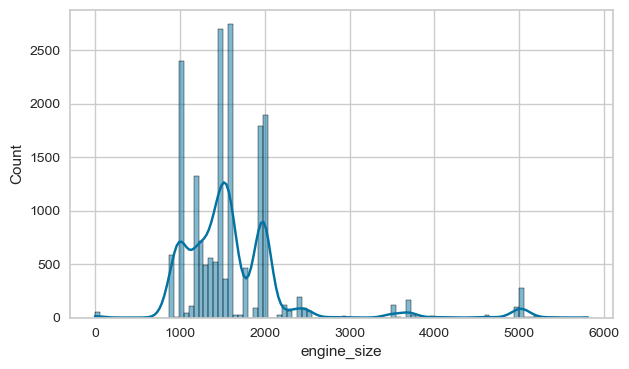

In [607]:
sns.histplot(df.engine_size, bins=100, kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x25615636090>,
 'caps': [<matplotlib.lines.Line2D at 0x25615637490>,
 'boxes': [<matplotlib.lines.Line2D at 0x25615622590>],
 'medians': [<matplotlib.lines.Line2D at 0x25616930750>],
 'fliers': [<matplotlib.lines.Line2D at 0x25615637210>],
 'means': []}

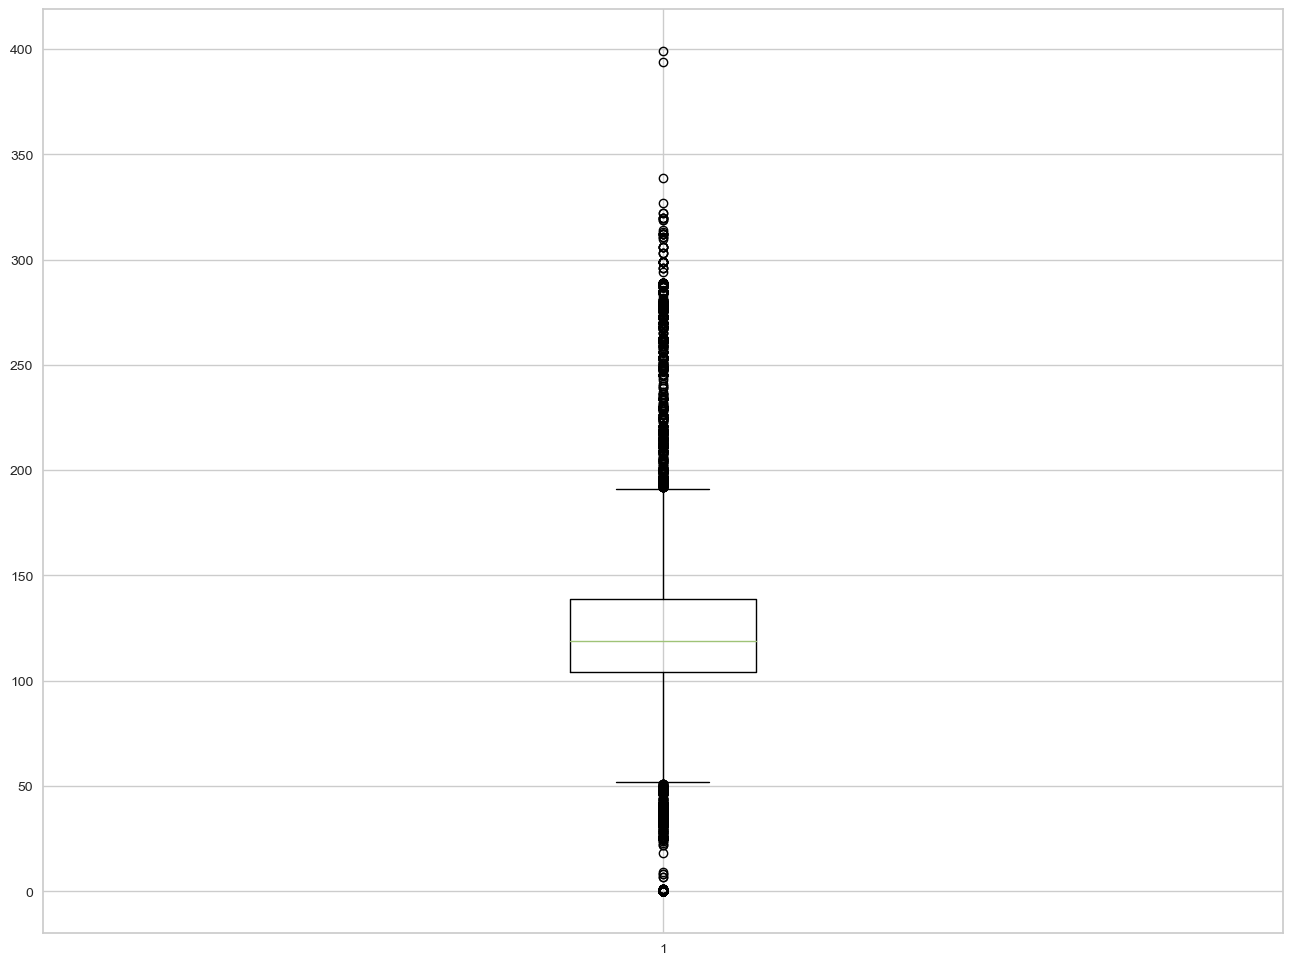

In [608]:
plt.figure(figsize=(16,12))
plt.boxplot(df['co_emissions'])

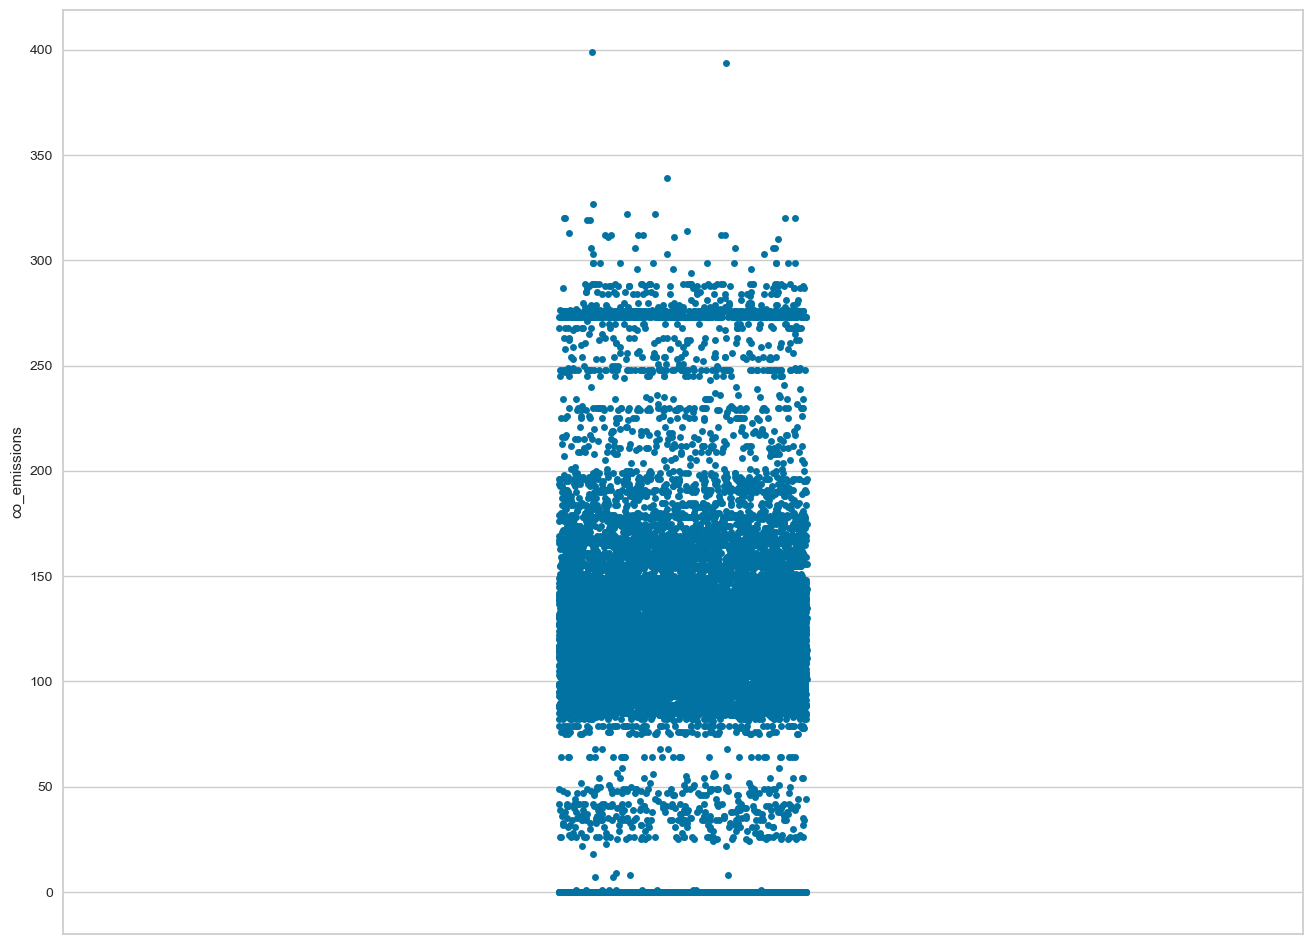

In [609]:
plt.figure(figsize=(16,12))
sns.stripplot(df.co_emissions);

<Axes: xlabel='co_emissions', ylabel='Count'>

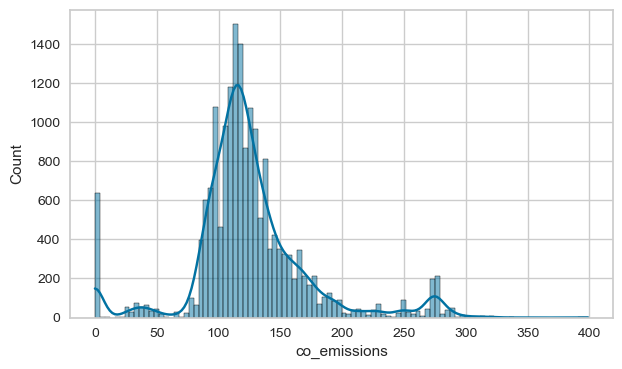

In [610]:
sns.histplot(df.co_emissions, bins=100, kde=True)

In [611]:
total_outliers = []

for model in df.make_model.unique():

    car_prices = df[df["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR

    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()

    total_outliers.append(count_of_outliers)

    print(f" The count of outlier for {model:<24} : {count_of_outliers:<2},\
    The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Mercedes-Benz A 180      : 0 ,    The rate of outliers : 0.0
 The count of outlier for Opel Corsa               : 4 ,    The rate of outliers : 0.011
 The count of outlier for Opel Astra               : 10,    The rate of outliers : 0.016
 The count of outlier for Opel Adam                : 1 ,    The rate of outliers : 0.009
 The count of outlier for Opel Insignia            : 19,    The rate of outliers : 0.066
 The count of outlier for Opel Cascada             : 1 ,    The rate of outliers : 0.008
 The count of outlier for Opel Grandland X         : 1 ,    The rate of outliers : 0.007
 The count of outlier for Renault Megane           : 38,    The rate of outliers : 0.046
 The count of outlier for Renault Clio             : 8 ,    The rate of outliers : 0.02
 The count of outlier for Renault Captur           : 0 ,    The rate of outliers : 0.0
 The count of outlier for Renault Talisman         : 5 ,    The rate of outliers : 0.036
 The count of outlier for 

<Axes: xlabel='price', ylabel='Count'>

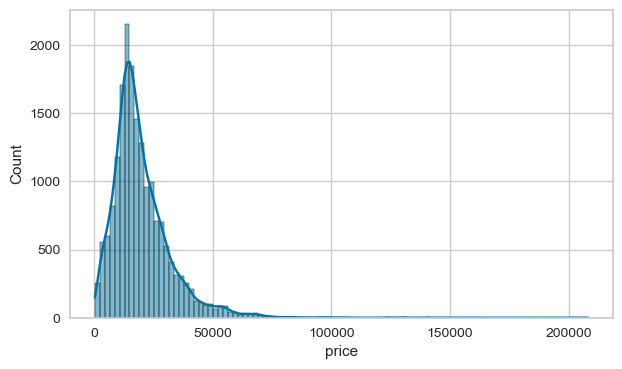

In [612]:
sns.histplot(df.price, bins=100, kde=True)

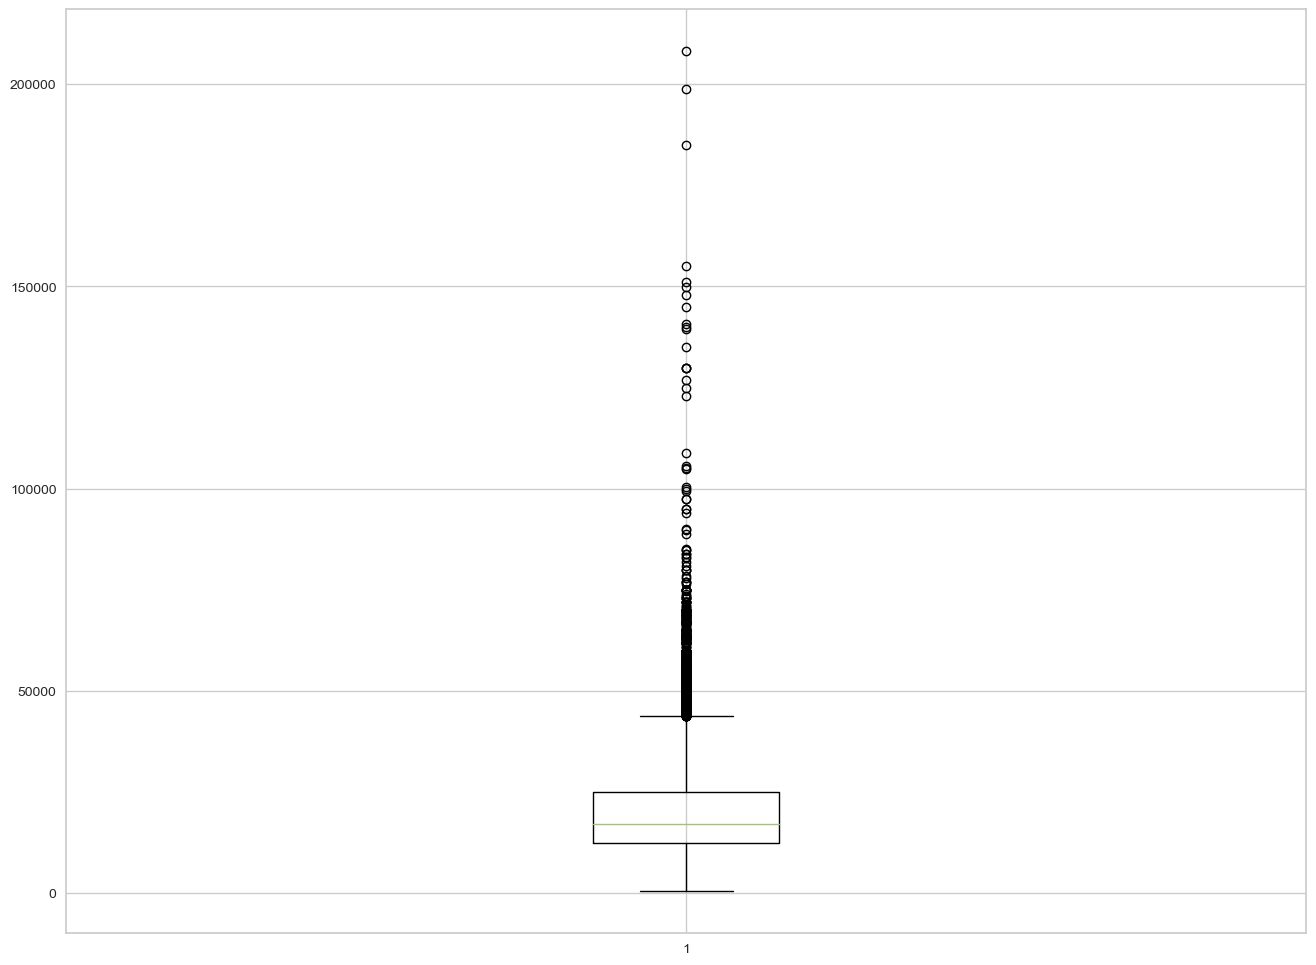

In [613]:
plt.figure(figsize=(16,12))
plt.boxplot(df['price'])
plt.show()

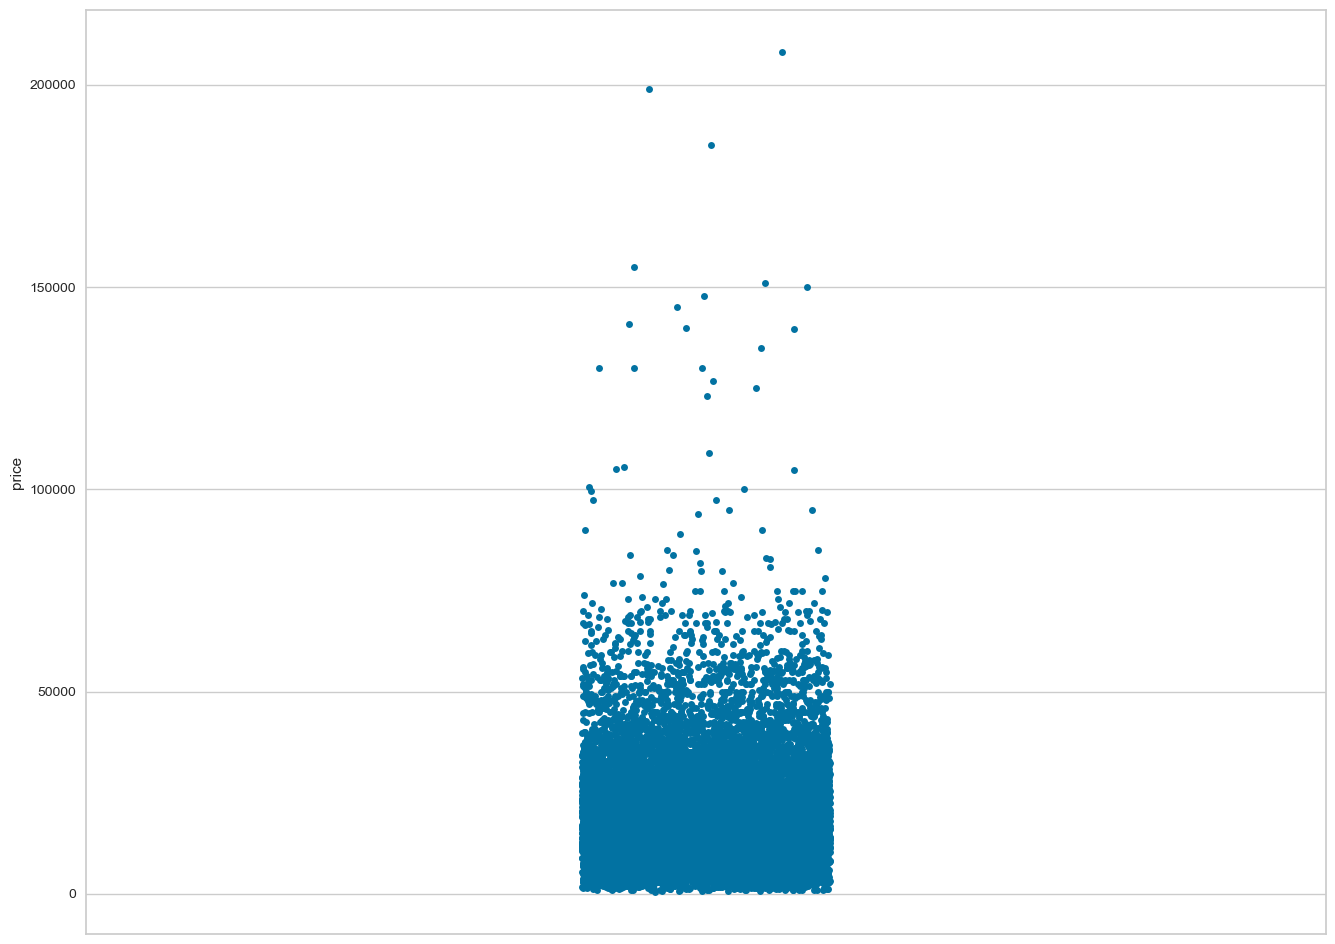

In [614]:
plt.figure(figsize=(16,12))
sns.stripplot(df.price);

## multicollinearity control

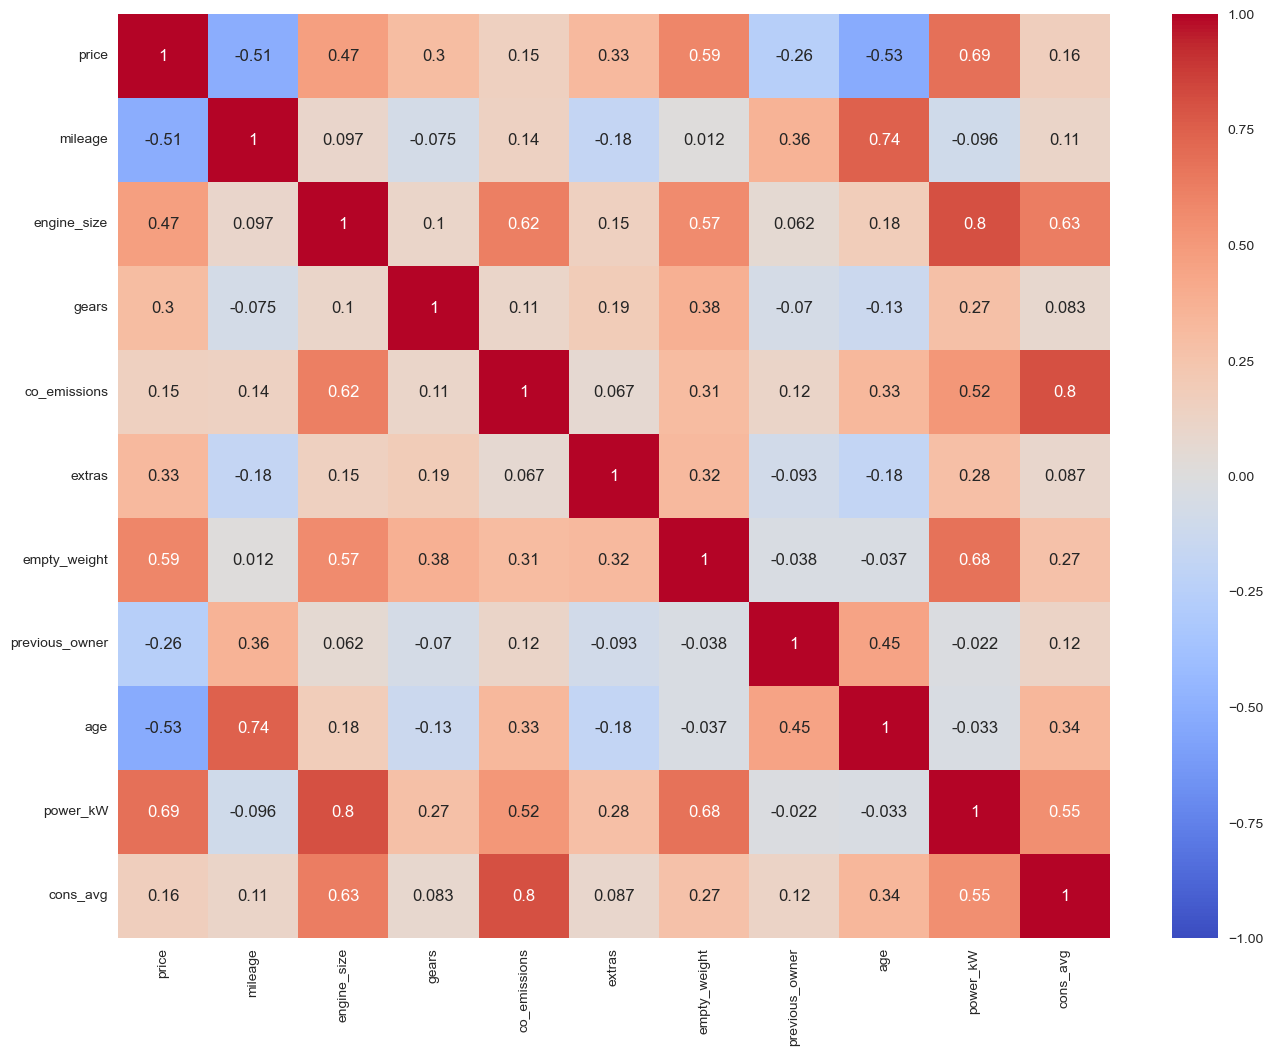

In [615]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");
plt.show()
#As we can see from the graph, there is no multicollinearity in the data.

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

## OneHotEncoder

### Example

In [616]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

# OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.
# We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege,
# categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.
# However, when converting to categorical data, the following should not be forgotten: if there is a hierarchical superiority or ranking (expensive,
# normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.
# We will talk about this algorithm when it takes place. Conversion of categorical data to dummies features is done according to the unique categorical data in the train set where the fit process is performed.
# With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".
# If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.

In [617]:
data = {"col": ['bad','worst','good', 'good', 'bad', "bed",'good', 'good', 'bad', "car"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data

,col,y
0,bad,1
1,worst,2
2,good,3
3,good,4
4,bad,5
5,bed,6
6,good,7
7,good,8
8,bad,9
9,car,10


In [618]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.3, shuffle=False)

In [619]:
X_train

,col
0,bad
1,worst
2,good
3,good
4,bad
5,bed
6,good


In [620]:
X_test

,col
7,good
8,bad
9,car


In [621]:
enc.fit_transform(X_train)
# Since the fit process is done on the train set,
# the transformation (transformation) in both the train and the test set will only be made according to the unique observations in the train set.


,col_bad,col_bed,col_good,col_worst
0,1.000,0.000,0.000,0.000
1,0.000,0.000,0.000,1.000
2,0.000,0.000,1.000,0.000
3,0.000,0.000,1.000,0.000
4,1.000,0.000,0.000,0.000
5,0.000,1.000,0.000,0.000
6,0.000,0.000,1.000,0.000


In [622]:
enc.transform(X_test)
# Since the transformation in the test set is made according to the unique observations in the train set,
# the unique observations in both the train and the test set are converted to 1, while the non-observations (car) are converted to 0.


,col_bad,col_bed,col_good,col_worst
7,0.000,0.000,1.000,0.000
8,1.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000


## OrdinalEncoder

### Example

In [623]:
data = {"col": ['bad','worst','good', 'good', 'bad', 'good', 'good', 'bad', "ugly", "worst"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data
# If unique categorical data under a featura have a hierarchical advantage over each other (very bad, bad, good)
# or (cheap, average, expensive, very expensive) etc. If we want the model to treat all observations according to
# their superiority, that is, not to treat them equally, we use the ordianlencoder conversion algorithm.
# NOTE: Ordinalencoder has a special use in tree-based models. In this usage, we will always use ordinalencoder,
# regardless of whether the observations have a hierarchical superiority to each other. As for tree based models,
# this special usage will be explained in detail.

,col,y
0,bad,1
1,worst,2
2,good,3
3,good,4
4,bad,5
5,good,6
6,good,7
7,bad,8
8,ugly,9
9,worst,10


In [624]:
X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.4, shuffle=False)

In [625]:
X_train

,col
0,bad
1,worst
2,good
3,good
4,bad
5,good


In [626]:
X_test

,col
6,good
7,bad
8,ugly
9,worst


In [627]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']
# We need to define the order of the categories explicitly.

enc_2 = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")
# In ordinal encoder we can not use "ignore" case, other than that we use "use_encoded_value" parameter.
# We set the unknown_value as -1, since we want to be sure as it a different category.

In [628]:
enc_2.fit_transform(X_train)

,col
0,1.000
1,0.000
2,2.000
3,2.000
4,1.000
5,2.000


In [629]:
enc_2.transform(X_test)

,col
6,2.000
7,1.000
8,-1.000
9,0.000


### Train | Test Split

In [630]:
X = df.drop('price', axis=1)
y = df.price

In [631]:
X.head()

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Compact,Used,Yes,27150.000,Manual,Diesel,1461.000,6.000,120.000,Front,5,1330.000,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Compact,Used,No,157500.000,Manual,Diesel,1991.000,6.000,138.000,Front,6,1295.000,Yes,Cloth,2.000,unefficient,12.000,80.000,5.200,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Compact,Used,Yes,21734.000,Automatic,Diesel,1461.000,7.000,99.500,Front,1,1445.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Compact,Used,Yes,172700.000,Automatic,Diesel,1461.000,7.000,99.500,Front,1,1425.000,No,Cloth,3.000,unefficient,4.000,80.000,3.700,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Compact,Used,Yes,18989.000,Automatic,Diesel,1461.000,7.000,99.500,Front,1,1455.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package


In [632]:
y.head()

0   24400.000
1    7450.000
2   29800.000
3   21000.000
4   26800.000
Name: price, dtype: float64

In [633]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [634]:
X_train

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
16734,Volvo V40,Compact,Used,Yes,98027.000,Automatic,Diesel,1560.000,6.000,89.000,Front,1,1472.000,No,Part/Full Leather,3.000,efficient,7.000,84.000,3.900,Standard,Standard,Safety Premium Package
14781,Ford Mondeo,Station wagon,Used,Yes,17195.000,Automatic,Diesel,1995.000,8.000,136.000,4WD,7,1826.000,Yes,Part/Full Leather,1.000,efficient,1.000,140.000,5.200,Premium,Plus,Safety Premium Package
2414,Renault Megane,Coupe,Used,No,225000.000,Manual,Benzine,1998.000,6.000,178.000,Front,6,1395.000,No,Part/Full Leather,1.000,efficient,13.000,132.000,7.600,Standard,Standard,Safety Premium Package
1430,Opel Astra,Sedan,Used,No,62807.000,Automatic,Benzine,1364.000,8.000,157.000,Front,4,1280.000,Yes,Cloth,4.000,efficient,8.000,103.000,6.700,Premium,Standard,Safety Premium Package
1512,Opel Adam,Sedan,Used,Yes,60750.000,Manual,Benzine,1398.000,5.000,0.000,Front,9,1120.000,Yes,Cloth,1.000,unefficient,3.000,74.000,0.000,Premium,Plus,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,Toyota RAV 4,Off-Road/Pick-up,Used,No,62786.000,Manual,Benzine,1987.000,6.000,158.000,4WD,3,1700.000,No,Part/Full Leather,2.000,unefficient,6.000,112.000,6.800,Premium,Standard,Safety Premium Package
11964,Toyota Aygo,Sedan,Used,No,19715.000,Manual,Benzine,998.000,5.000,93.000,Front,1,965.000,No,Cloth,1.000,efficient,3.000,53.000,4.100,Standard,Plus,Safety Standard Package
5390,Fiat Panda,Compact,Used,Yes,106700.000,Manual,Diesel,1248.000,5.000,117.000,4WD,2,1055.000,No,Cloth,1.000,efficient,5.000,70.000,4.400,Standard,Plus,Safety Premium Package
860,Opel Astra,Coupe,Used,No,205000.000,Manual,Benzine,1364.000,5.000,151.000,Front,1,1110.000,Yes,Cloth,3.000,efficient,17.000,66.000,6.300,Standard,Standard,Safety Premium Package


In [635]:
X_train.shape

(14557, 23)

In [636]:
y_train

16734   14393.000
14781   40940.000
2414     4950.000
1430    15970.000
1512    11990.000
           ...   
11284   21480.000
11964    9960.000
5390    15727.000
860      2900.000
15795   34990.000
Name: price, Length: 14557, dtype: float64

In [637]:
y_train.shape

(14557,)

In [638]:
X_test

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
15071,Ford Focus,Sedan,Used,Yes,27532.000,Manual,Diesel,1500.000,6.000,109.000,Front,8,1280.000,No,Cloth,1.000,efficient,2.000,88.000,3.600,Premium,Plus,Safety Premium Package
10999,Toyota Aygo,Compact,Used,Yes,31167.000,Manual,Benzine,998.000,5.000,93.000,Front,4,985.000,No,Cloth,1.000,efficient,2.000,53.000,4.000,Standard,Plus,Safety Premium Package
14000,Ford Mustang,Convertible,Used,No,33800.000,Automatic,Benzine,5083.000,6.000,273.000,Rear,9,1893.000,Yes,Part/Full Leather,1.000,unefficient,4.000,310.000,12.500,Standard,Plus,Safety Premium Package
15766,Hyundai TUCSON,Off-Road/Pick-up,Used,Yes,34850.000,Automatic,Diesel,1600.000,6.000,129.000,Front,1,1425.000,No,Cloth,1.000,unefficient,4.000,100.000,4.650,Standard,Standard,Safety Premium Package
4291,Peugeot 3008,Off-Road/Pick-up,Used,No,57430.000,Automatic,Diesel,1997.000,8.000,129.000,Front,15,1555.000,Yes,Part/Full Leather,1.000,efficient,3.000,132.000,4.900,Premium,Plus,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,Peugeot 207,Convertible,Used,No,9063.000,Manual,Benzine,1598.000,5.000,150.000,Front,1,1417.000,Yes,Cloth,1.000,unefficient,12.000,88.000,6.400,Standard,Standard,Safety Standard Package
14542,Ford Kuga,Off-Road/Pick-up,Used,No,111655.000,Manual,Benzine,1498.000,6.000,0.000,Front,7,1680.000,No,Part/Full Leather,2.000,efficient,7.000,110.000,5.650,Premium,Standard,Safety Premium Package
3053,Renault Talisman,Station wagon,Used,No,23576.000,Automatic,Diesel,1997.000,6.000,120.000,Front,3,1502.000,No,Cloth,1.000,unefficient,2.000,118.000,4.600,Standard,Standard,Safety Premium Package
7589,SEAT Arona,Off-Road/Pick-up,Used,No,34892.000,Automatic,Benzine,999.000,7.000,112.000,Front,5,1210.000,Yes,Cloth,1.000,efficient,3.000,85.000,5.000,Premium,Plus,Safety Premium Package


In [639]:
X_test.shape

(3640, 23)

In [640]:
y_test

15071   21900.000
10999   12990.000
14000   63900.000
15766   25500.000
4291    27490.000
           ...   
3844     7800.000
14542   12950.000
3053    31990.000
7589    21900.000
4461    16490.000
Name: price, Length: 3640, dtype: float64

In [641]:
y_test.shape

(3640,)

### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

In [642]:
df.select_dtypes('O').columns

Index(['make_model', 'body_type', 'type', 'warranty', 'gearbox', 'fuel_type',
       'drivetrain', 'full_service_history', 'upholstery',
       'energy_efficiency_class', 'comfort_&_convenience_Package',
       'entertainment_&_media_Package', 'safety_&_security_Package'],
      dtype='object')

In [643]:
df.make_model.unique() #For this column, I should use OneHotEncoder

array(['Mercedes-Benz A 180', 'Opel Corsa', 'Opel Astra', 'Opel Adam',
       'Opel Insignia', 'Opel Cascada', 'Opel Grandland X',
       'Renault Megane', 'Renault Clio', 'Renault Captur',
       'Renault Talisman', 'Renault Kadjar', 'Peugeot 308', 'Peugeot 206',
       'Peugeot 208', 'Peugeot 207', 'Peugeot 3008', 'Peugeot 508',
       'Peugeot RCZ', 'Peugeot 2008', 'Fiat 500', 'Fiat Tipo',
       'Fiat 500X', 'Fiat Panda', 'Fiat 500C', 'SEAT Leon', 'SEAT Ibiza',
       'SEAT Arona', 'SEAT Ateca', 'Skoda Octavia', 'Skoda Scala',
       'Skoda Fabia', 'Skoda Superb', 'Skoda Kodiaq', 'Skoda Karoq',
       'Dacia Sandero', 'Dacia Logan', 'Dacia Duster', 'Toyota Yaris',
       'Toyota Aygo', 'Toyota Corolla', 'Toyota Auris', 'Toyota C-HR',
       'Toyota RAV 4', 'Nissan Micra', 'Nissan Qashqai', 'Nissan Juke',
       'Nissan Pulsar', 'Nissan 370Z', 'Nissan 350Z', 'Nissan X-Trail',
       'Ford Fiesta', 'Ford Focus', 'Ford Mondeo', 'Ford Kuga',
       'Ford Mustang', 'Hyundai i30', 'Hyund

In [644]:
df.body_type.unique() #For this column, I should use OneHotEncoder

array(['Compact', 'Sedan', 'Convertible', 'Coupe', 'Off-Road/Pick-up',
       'Station wagon'], dtype=object)

In [645]:
df.type.unique() #For this column, I should use OrdinalEncoder

array(['Used', 'Pre-registered', 'Demonstration', "Employee's car"],
      dtype=object)

In [646]:
df.fuel_type.unique() #For this column, I should use OneHotEncoder

array(['Diesel', 'Benzine', 'Liquid/Natural Gas', 'Electric'],
      dtype=object)

In [647]:
df.warranty.unique() #For this column, I should use OneHotEncoder

array(['Yes', 'No'], dtype=object)

In [648]:
df.gearbox.unique() #For this column, I should use OneHotEncoder

array(['Manual', 'Automatic', 'Semi-automatic'], dtype=object)

In [649]:
df.drivetrain.unique() #For this column, I should use OneHotEncoder 

array(['Front', 'Rear', '4WD'], dtype=object)

In [650]:
df['comfort_&_convenience_Package'].unique() #For this column, I should use OrdinalEncoder  

array(['Standard', 'Premium', 'Premium Plus'], dtype=object)

In [651]:
df['entertainment_&_media_Package'].unique() #For this column, I should use OrdinalEncoder 

array(['Plus', 'Standard'], dtype=object)

In [652]:
df['safety_&_security_Package'].unique() #For this column, I should use OrdinalEncoder 

array(['Safety Premium Package', 'Safety Premium Plus Package',
       'Safety Standard Package'], dtype=object)

In [653]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [654]:
#OneHotEncoder columns
onehot_columns = ['make_model', 'body_type', 'warranty', 'gearbox', 'fuel_type','drivetrain', 'full_service_history',
              'upholstery', 'energy_efficiency_class']

#OrdinalEncoder columns
ordinal_columns = ['type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package', 'safety_&_security_Package']

#Now, I will take each column of OrdinalEnconder columns and put their values.
#The first one is type:
types = ['Used', 'Pre-registered', 'Demonstration', "Employee's car"]
#comfort_&_convenience_Package
comfort = ['Standard', 'Premium', 'Premium Plus']
#entertainment_&_media_Package
enter = ['Plus', 'Standard']
#safety_&_security_Package
safety = ['Safety Premium Package', 'Safety Premium Plus Package',
       'Safety Standard Package']

In [655]:
one_cat = OneHotEncoder(handle_unknown="ignore", sparse=False)
ord_cat = OrdinalEncoder(categories = [types, comfort, enter, safety])

In [656]:
#Now, I will convert them by make_column_transformer
trans_data = make_column_transformer((one_cat, onehot_columns), (ord_cat, ordinal_columns), 
                                     remainder='passthrough', verbose_feature_names_out=False)

trans_data = trans_data.set_output(transform='pandas')

In [657]:
df.select_dtypes('O').columns

Index(['make_model', 'body_type', 'type', 'warranty', 'gearbox', 'fuel_type',
       'drivetrain', 'full_service_history', 'upholstery',
       'energy_efficiency_class', 'comfort_&_convenience_Package',
       'entertainment_&_media_Package', 'safety_&_security_Package'],
      dtype='object')

In [658]:
X_train.head()

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
16734,Volvo V40,Compact,Used,Yes,98027.000,Automatic,Diesel,1560.000,6.000,89.000,Front,1,1472.000,No,Part/Full Leather,3.000,efficient,7.000,84.000,3.900,Standard,Standard,Safety Premium Package
14781,Ford Mondeo,Station wagon,Used,Yes,17195.000,Automatic,Diesel,1995.000,8.000,136.000,4WD,7,1826.000,Yes,Part/Full Leather,1.000,efficient,1.000,140.000,5.200,Premium,Plus,Safety Premium Package
2414,Renault Megane,Coupe,Used,No,225000.000,Manual,Benzine,1998.000,6.000,178.000,Front,6,1395.000,No,Part/Full Leather,1.000,efficient,13.000,132.000,7.600,Standard,Standard,Safety Premium Package
1430,Opel Astra,Sedan,Used,No,62807.000,Automatic,Benzine,1364.000,8.000,157.000,Front,4,1280.000,Yes,Cloth,4.000,efficient,8.000,103.000,6.700,Premium,Standard,Safety Premium Package
1512,Opel Adam,Sedan,Used,Yes,60750.000,Manual,Benzine,1398.000,5.000,0.000,Front,9,1120.000,Yes,Cloth,1.000,unefficient,3.000,74.000,0.000,Premium,Plus,Safety Premium Package


In [659]:
X_train.shape

(14557, 23)

In [660]:
X_train_trans = trans_data.fit_transform(X_train) #for X_train, we use fit_transform
X_test_trans = trans_data.transform(X_test) #for X_test, we use only transform

## Scaling

In [661]:
scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train_trans)

MinMaxScaler()

In [662]:
X_train_scaled = scaler.transform(X_train_trans) #For X_train_trans, we use fit and transform
X_test_scaled = scaler.transform(X_test_trans) #Foer X_test_trans, we use only transform

In [663]:
X_train_scaled

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,warranty_No,warranty_Yes,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,full_service_history_No,full_service_history_Yes,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient,type,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
16734,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.163,0.268,0.714,0.223,0.000,0.371,0.250,0.350,0.109,0.213
14781,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.500,0.000,0.000,0.029,0.343,1.000,0.341,0.316,0.545,0.000,0.050,0.258,0.284
2414,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0

In [664]:
X_test_scaled

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,warranty_No,warranty_Yes,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,full_service_history_No,full_service_history_Yes,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient,type,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
15071,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.500,0.000,0.000,0.046,0.258,0.714,0.273,0.368,0.276,0.000,0.100,0.120,0.197
10999,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.052,0.172,0.571,0.233,0.158,0.131,0.000,0.100,0.027,0.219
14000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [665]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [666]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [667]:
train_val(linear_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.833,0.832
mae,2831.009,2776.392
mse,26837781.145,24314905.621
rmse,5180.519,4931.015


## Cross Validate

In [668]:
model = LinearRegression()

scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

scores = cross_validate(model, X_train_scaled, y_train, scoring = scoring, cv=10, return_train_score=True)

df_scores = pd.DataFrame(scores).iloc[:, 2:].mean()
df_scores

#We can see from the scores that, there is no overfitting

test_r2                                     0.833
train_r2                                    0.833
test_neg_mean_absolute_error            -2853.677
train_neg_mean_absolute_error           -2833.096
test_neg_mean_squared_error         -27260818.213
train_neg_mean_squared_error        -26841120.655
test_neg_root_mean_squared_error        -5172.624
train_neg_root_mean_squared_error       -5180.175
dtype: float64

## Prediction Error

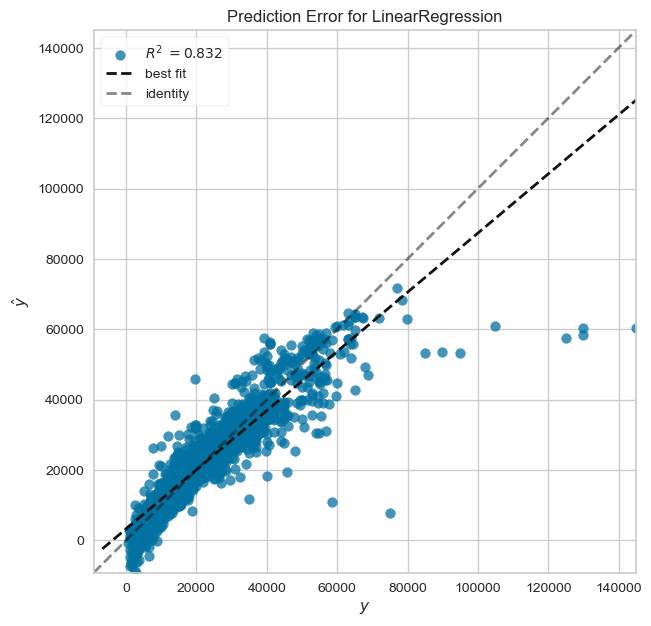

In [669]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(700, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test) 
visualizer.show();

## Residual Plot

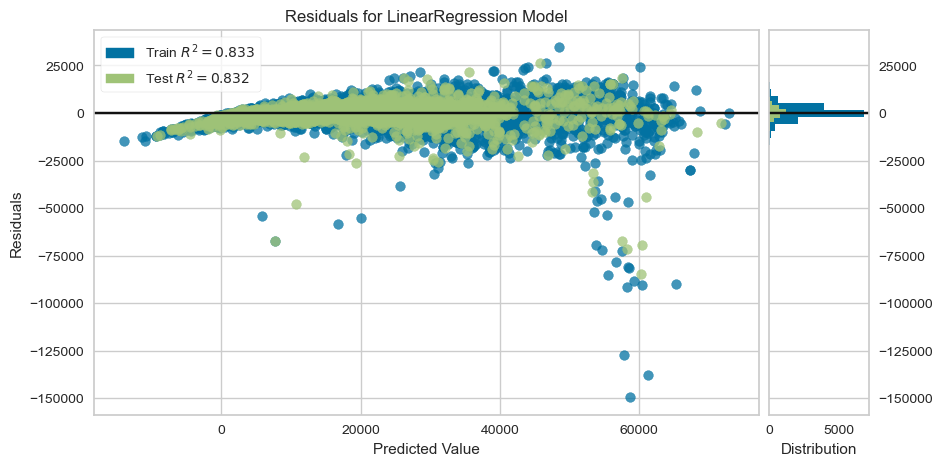

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [670]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

In [671]:
df.shape

(18197, 24)

In [672]:
df

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,1461.000,6.000,120.000,Front,5,1330.000,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,7450.000,Compact,Used,No,157500.000,Manual,Diesel,1991.000,6.000,138.000,Front,6,1295.000,Yes,Cloth,2.000,unefficient,12.000,80.000,5.200,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,29800.000,Compact,Used,Yes,21734.000,Automatic,Diesel,1461.000,7.000,99.500,Front,1,1445.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,21000.000,Compact,Used,Yes,172700.000,Automatic,Diesel,1461.000,7.000,99.500,Front,1,1425.000,No,Cloth,3.000,unefficient,4.000,80.000,3.700,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,26800.000,Compact,Used,Yes,18989.000,Automatic,Diesel,1461.000,7.000,99.500,Front,1,1455.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18192,Volvo V40,13000.000,Sedan,Used,No,114000.000,Manual,Diesel,1969.000,6.000,94.000,Front,9,1532.000,Yes,Cloth,1.000,efficient,4.000,88.000,3.600,Standard,Standard,Safety Premium Package
18193,Volvo S60,4999.000,Sedan,Used,Yes,166512.000,Manual,Benzine,2521.000,5.000,145.000,Front,1,1550.000,No,Part/Full Leather,3.000,efficient,18.000,154.000,9.100,Standard,Standard,Safety Premium Package
18194,Volvo S90,37600.000,Sedan,Used,Yes,40345.000,Automatic,Diesel,1969.000,8.000,127.000,4WD,1,2077.000,No,Part/Full Leather,2.000,efficient,3.000,288.000,2.000,Standard,Standard,Safety Premium Plus Package
18195,Volvo C30,7300.000,Sedan,Used,Yes,96000.000,Manual,Diesel,1560.000,6.000,99.000,Front,3,1356.000,Yes,Cloth,1.000,unefficient,11.000,84.000,3.800,Standard,Standard,Safety Premium Package


In [673]:
#As we seen from the graphs, we can say that the values under 7500, and above 70000 are damaging the model.
#So, in this case, i will drop them
df = df[(df.price > 7500) & (df.price < 70000)]

In [674]:
df.shape

(16370, 24)

In [675]:
X = df.drop('price', axis=1)
y = df.price

In [676]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [677]:
X_train.shape

(13096, 23)

In [678]:
X_test.shape

(3274, 23)

In [679]:
X_train.head()

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
7674,SEAT Leon,Station wagon,Used,No,35977.000,Automatic,Benzine,1984.000,7.000,172.000,Front,5,1476.000,Yes,Part/Full Leather,1.000,efficient,3.000,213.000,6.500,Standard,Plus,Safety Premium Package
13227,Nissan Micra,Sedan,Used,Yes,74314.000,Manual,Diesel,1461.000,5.000,107.000,Front,7,1153.000,Yes,Cloth,1.000,efficient,4.000,66.000,4.100,Premium,Plus,Safety Premium Package
8532,Skoda Octavia,Compact,Used,Yes,39563.000,Automatic,Benzine,999.000,7.000,128.000,Front,1,1247.000,No,Cloth,1.000,efficient,3.000,85.000,4.700,Standard,Standard,Safety Premium Plus Package
4458,Peugeot 508,Off-Road/Pick-up,Used,Yes,80300.000,Automatic,Diesel,1997.000,6.000,100.000,4WD,2,1845.000,No,Part/Full Leather,2.000,efficient,5.000,147.000,4.000,Standard,Standard,Safety Premium Package
15437,Hyundai i30,Compact,Used,Yes,24576.000,Manual,Benzine,1591.000,6.000,137.000,Front,1,1196.000,No,Cloth,1.000,unefficient,6.000,100.000,5.000,Standard,Standard,Safety Standard Package


In [680]:
X_train_trans = trans_data.fit_transform(X_train) #for X_train, we use fit_transform
X_test_trans = trans_data.transform(X_test) #for X_test, we use only transform

## scaling

In [681]:
scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train_trans)

MinMaxScaler()

In [682]:
X_train_scaled = scaler.transform(X_train_trans) #For X_train_trans, we use fit and transform
X_test_scaled = scaler.transform(X_test_trans) #Foer X_test_trans, we use only transform

In [683]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [684]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.882,0.878
mae,2554.357,2486.954
mse,13870050.551,13278014.221
rmse,3724.252,3643.901


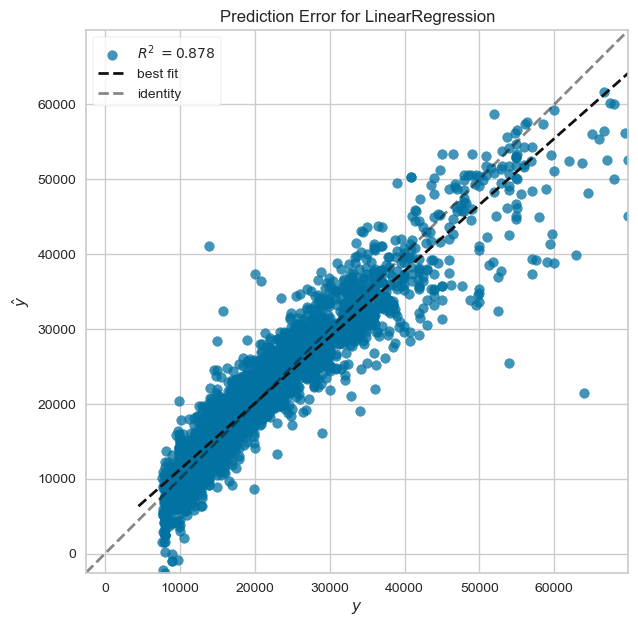

In [685]:
visualizer = RadViz(size=(700, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test) 
visualizer.show();

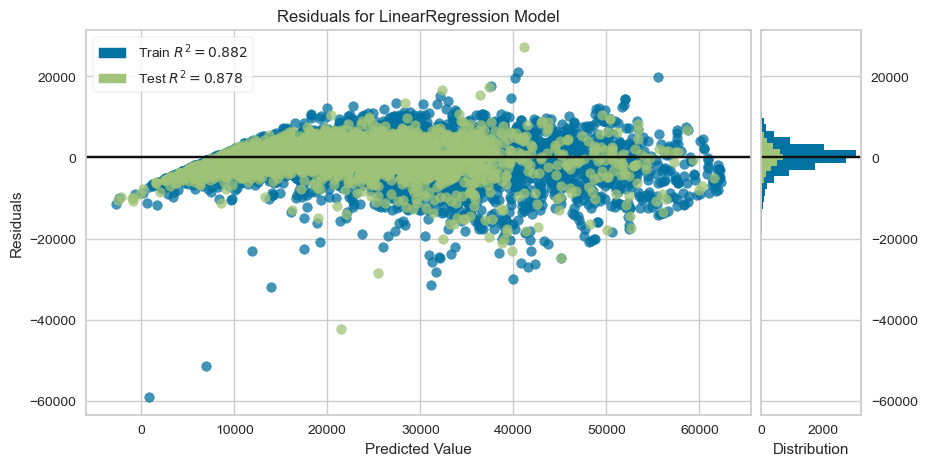

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [686]:
visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

In [687]:
model = LinearRegression()

scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

scores = cross_validate(model, X_train_scaled, y_train, scoring = scoring, cv=10, return_train_score=True)

df_scores = pd.DataFrame(scores).iloc[:, 2:].mean()
df_scores

#As we can see, there is no overfitting

test_r2                                     0.879
train_r2                                    0.882
test_neg_mean_absolute_error            -2577.293
train_neg_mean_absolute_error           -2554.872
test_neg_mean_squared_error         -14156956.242
train_neg_mean_squared_error        -13853021.260
test_neg_root_mean_squared_error        -3758.253
train_neg_root_mean_squared_error       -3721.907
dtype: float64

In [688]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.882,0.878
mae,2554.357,2486.954
mse,13870050.551,13278014.221
rmse,3724.252,3643.901


## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

In [689]:
from sklearn.pipeline import Pipeline

## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

In [690]:
operations = [('OneHot_Ordinal_Encoder', trans_data), ('Scaler', MinMaxScaler()), ('ridge', Ridge())]

ridge_model = Pipeline(steps=operations).set_output(transform='pandas')

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['...
                                                                              "Employee's "
                                                                              'car'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Plus',
                                                                              'Standard'],
                                                                             ['Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Standard '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('Scaler', MinMaxScaler()), ('ridge', Ridge())])

In [691]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.882,0.878
mae,2552.068,2481.503
mse,13867716.060,13257603.997
rmse,3723.938,3641.099


## Cross Validation

In [692]:
operations = [('OneHot_Ordinal_Encoder', trans_data), ('Scaler', MinMaxScaler()), ('ridge', Ridge())]

pipe_model = Pipeline(steps=operations).set_output(transform='pandas')

scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

scores = cross_validate(pipe_model, X_train, y_train, scoring = scoring, cv=10, return_train_score=True)

df_scores = pd.DataFrame(scores).iloc[:, 2:].mean()
df_scores

test_r2                                     0.880
train_r2                                    0.882
test_neg_mean_absolute_error            -2574.741
train_neg_mean_absolute_error           -2551.341
test_neg_mean_squared_error         -14150742.565
train_neg_mean_squared_error        -13853994.409
test_neg_root_mean_squared_error        -3757.409
train_neg_root_mean_squared_error       -3722.042
dtype: float64

## Finding best alpha for Ridge

In [693]:
alpha_space = np.linspace(0.001, 0.01, 100)
operations = [("OneHot_Ordinal_Encoder", trans_data),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha': alpha_space} # Parameter names should be used together with the model name defined
                                           # in the pipeline.

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [694]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'warranty',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain',
                                                                          'full_service_history',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('ordinalencoder',...
       0.00736364, 0.00745455, 0.00754545, 0.00763636, 0.00772727,
       0.00781818, 0.00790909, 0.008     , 0.00809091, 0.00818182,
       0.00827273, 0.00836364, 0.00845455, 0.00854545, 0.00863636,
       0.00872727, 0.00881818, 0.00890909, 0.009     , 0.00909091,
       0.00918182, 0.00927273, 0.00936364, 0.00945455, 0.00954545,
       0.00963636, 0.00972727, 0.00981818, 0.00990909, 0.01      ])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [695]:
ridge_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['...
                                                                              'car'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Plus',
                                                                              'Standard'],
                                                                             ['Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Standard '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge(alpha=0.01))])

In [696]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.882,0.878
mae,2553.617,2485.091
mse,13860738.235,13256294.519
rmse,3723.001,3640.919


In [697]:
ridge_grid_model.best_index_

99

In [698]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3757.895
mean_train_score   -3720.900
Name: 99, dtype: object

## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [699]:
from sklearn.linear_model import Lasso

In [700]:
operations = [('OneHot_Ordinal_Encoder', trans_data), ('Scaler', MinMaxScaler()), ('lasso', Lasso())]

lasso_model = Pipeline(steps=operations).set_output(transform='pandas')

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['...
                                                                              "Employee's "
                                                                              'car'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Plus',
                                                                              'Standard'],
                                                                             ['Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Standard '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('Scaler', MinMaxScaler()), ('lasso', Lasso())])

In [701]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.882,0.878
mae,2554.258,2482.887
mse,13898248.625,13316205.101
rmse,3728.035,3649.138


## Cross Validation

In [ ]:
operations = [('OneHot_Ordinal_Encoder', trans_data), ('Scaler', MinMaxScaler()), ('lasso', Lasso())]

pipe_model = Pipeline(steps=operations).set_output(transform='pandas')

scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

scores = cross_validate(pipe_model, X_train, y_train, scoring = scoring, cv=10, return_train_score=True)

df_scores = pd.DataFrame(scores).iloc[:, 2:].mean()
df_scores

## Finding best alpha for Lasso

In [ ]:
alpha_space = np.linspace(0.001, 0.01, 1, 100)

operations = [("OneHot_Ordinal_Encoder", trans_data),
              ("scaler", MinMaxScaler()),
              ("lasso", Lasso())]

pipe_model = Pipeline(steps=operations)

param_grid = {'lasso__alpha': alpha_space}
                                           

lasso_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [ ]:
lasso_grid_model.fit(X_train, y_train)

In [ ]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
lasso_grid_model.best_index_

In [ ]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

In [ ]:
lasso_grid_model.best_estimator_

## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
operations = [('OneHot_Ordinal_Encoder', trans_data), ('Scaler', MinMaxScaler()), ('elastic', ElasticNet())]

elastic_model = Pipeline(steps=operations).set_output(transform='pandas')

elastic_model.fit(X_train, y_train)

In [ ]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

## Cross Validation

In [ ]:
operations = [('OneHot_Ordinal_Encoder', trans_data), ('Scaler', MinMaxScaler()), ('elastic', ElasticNet())]

pipe_model = Pipeline(steps=operations).set_output(transform='pandas')

scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

scores = cross_validate(pipe_model, X_train, y_train, scoring = scoring, cv=10, return_train_score=True)

df_scores = pd.DataFrame(scores).iloc[:, 2:].mean()
df_scores

## Finding best alpha and l1_ratio for ElasticNet

In [ ]:
alpha_space = np.linspace(0.001, 0.01, 1, 100)

operations = [('OneHot_Ordinal_Encoder', trans_data), ('Scaler', MinMaxScaler()), ('elastic', ElasticNet())]


pipe_model = Pipeline(steps=operations)

param_grid = {'elastic__alpha': alpha_space} # Parameter names should be used together with the model name defined
                                           # in the pipeline.

elastic_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [ ]:
elastic_grid_model.fit(X_train, y_train)

In [ ]:
elastic_grid_model.best_estimator_

In [ ]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
elastic_grid_model.best_index_

In [ ]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

## Cross Validate

## 7. Visually Compare Models Performance In a Graph

## Prediction a new observation
- Create an observation and predict its price

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___